In [1]:
import os
os.chdir('..')
os.getcwd()

'D:\\git repos\\lab1'

In [3]:
import pandas as pd

# Загрузка данных (путь к скачанному датасету)
df = pd.read_csv('data/heart-disease.csv')

# Определение числовых и категориальных признаков
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Проверка типов данных
print(df.dtypes)

# При необходимости коррекция типа (например для целевой переменной 'target')
if df['target'].dtype != 'int64':
    df['target'] = df['target'].astype(int)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [4]:
# Удаление дубликатов
duplicates_count = df.duplicated().sum()
print(f'Дубликаты: {duplicates_count}')
df = df.drop_duplicates()

# Проверка пропущенных значений
missing_counts = df.isnull().sum()
print('Пропущенные значения по столбцам:')
print(missing_counts[missing_counts > 0])

# Обработка пропущенных значений: удаление строк с пропусками
df = df.dropna()

Дубликаты: 1
Пропущенные значения по столбцам:
Series([], dtype: int64)


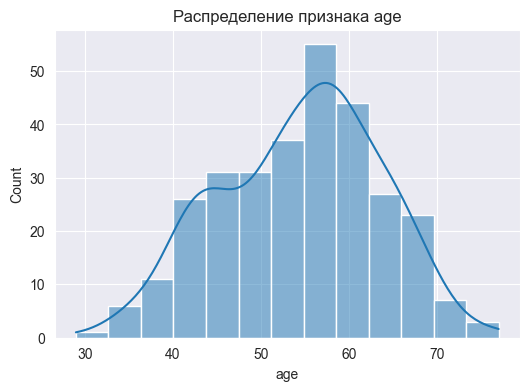

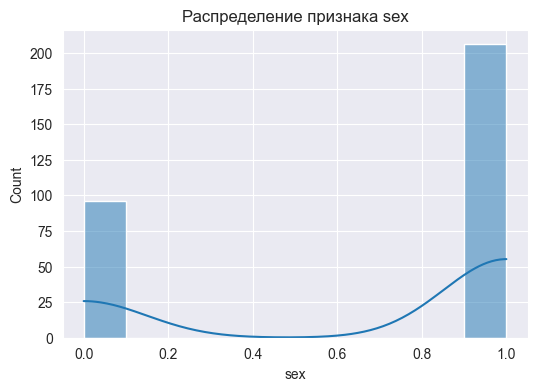

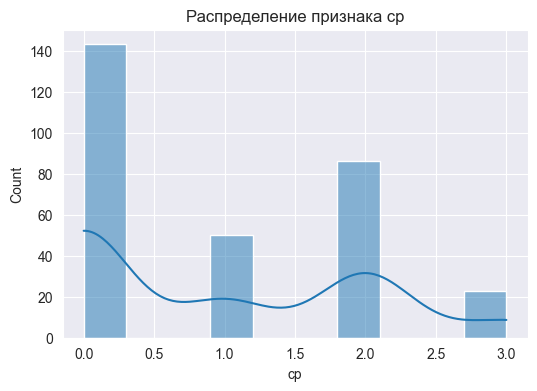

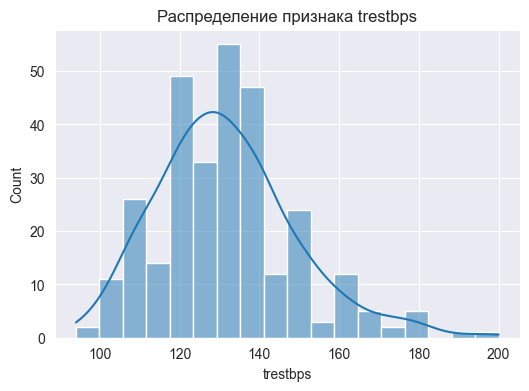

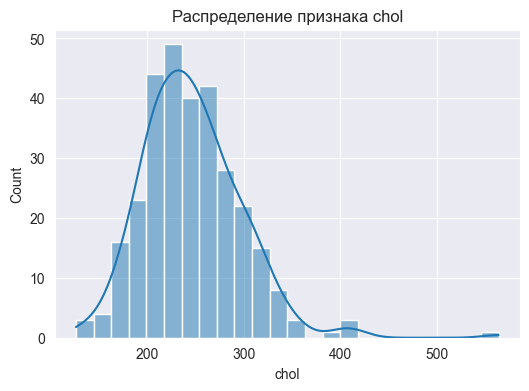

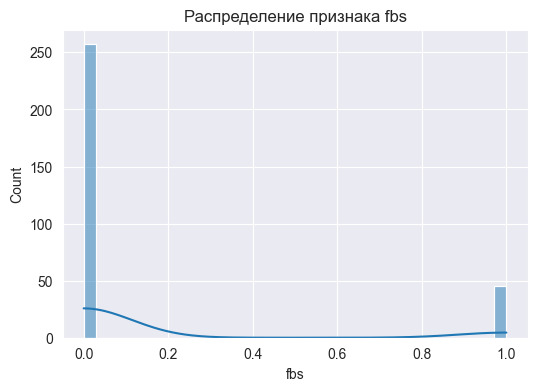

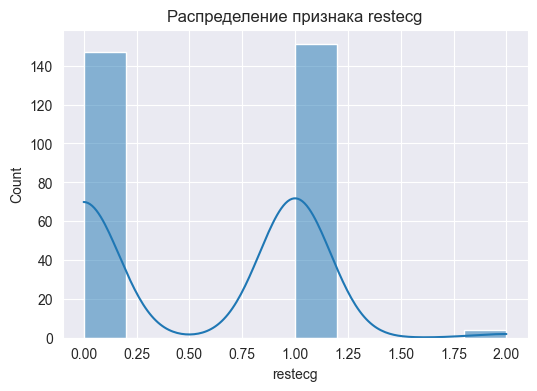

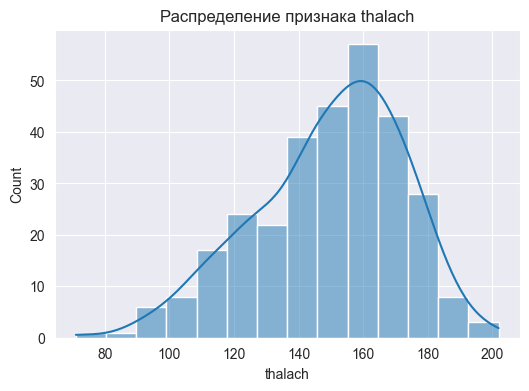

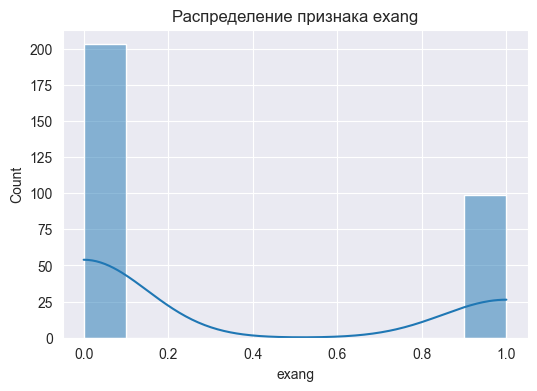

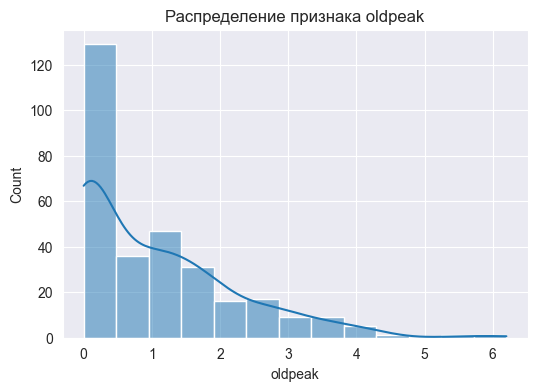

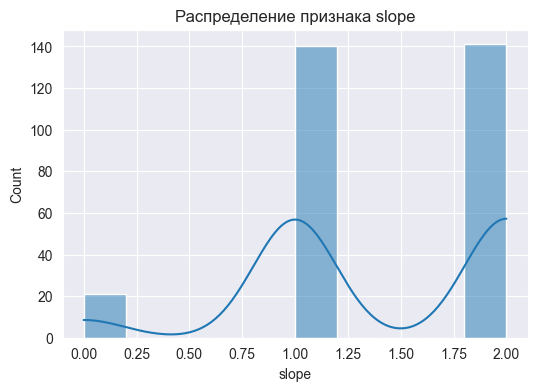

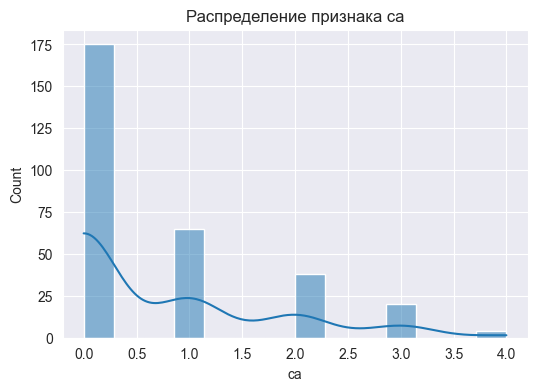

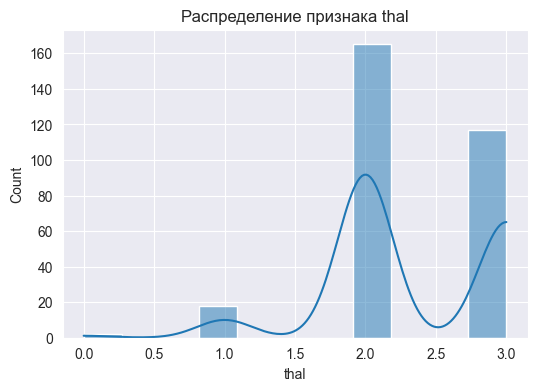

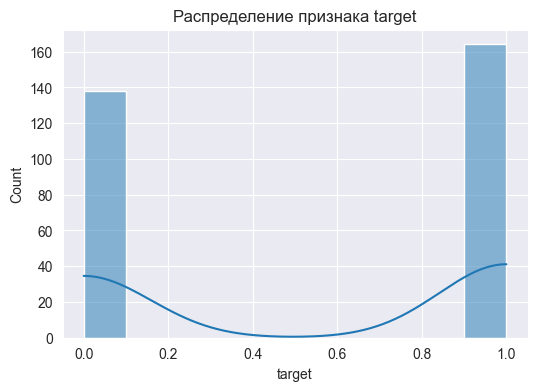

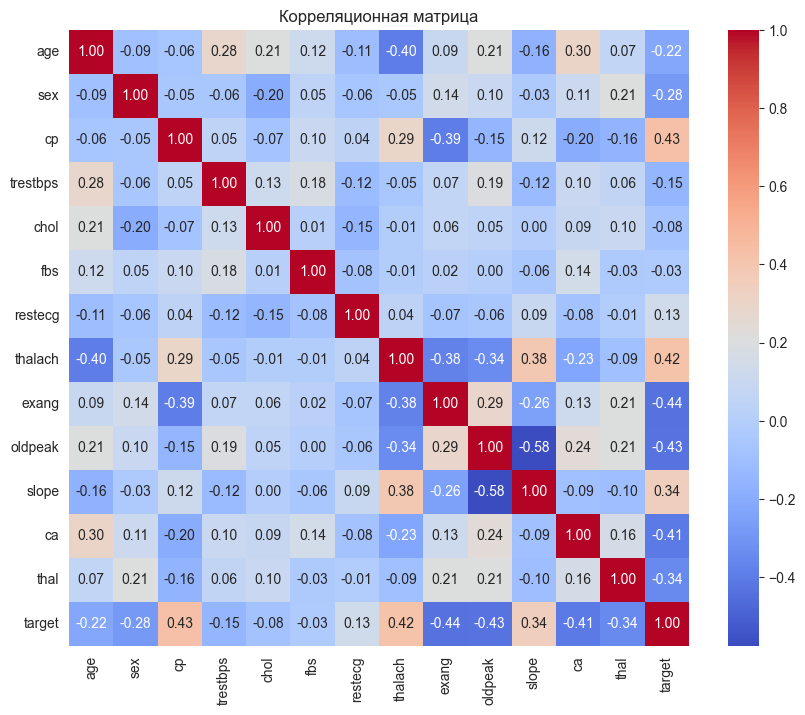

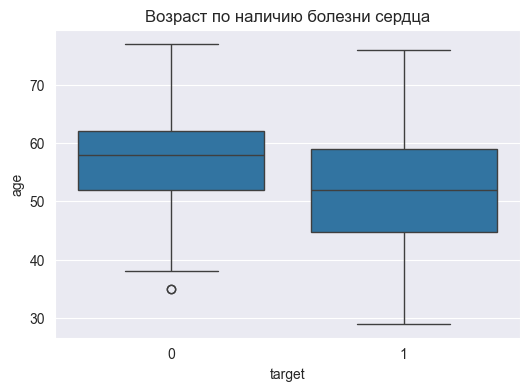

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Гистограмма числовых признаков
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Распределение признака {col}')
    plt.savefig(f'graph/hist_{col}.png')
    plt.show()
    plt.close()

# Корреляционная матрица
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.savefig('graph/correlation_matrix.png')
plt.show()
plt.close()

# Boxplot возраста по целевой переменной
plt.figure(figsize=(6, 4))
sns.boxplot(x='target', y='age', data=df)
plt.title('Возраст по наличию болезни сердца')
plt.savefig('graph/boxplot_age_target.png')
plt.show()
plt.close()

# Интерактивный график (scatter холестерин vs частота сердцебиения)
fig = px.scatter(df, x='chol', y='thalach', color='target',
                 title='Холестерин и максимальная частота сердца по целевой переменной')
fig.write_html('graph/interactive_chol_thalach.html')

***

**Выводы по графикам:**

- Признак `oldpeak` — сильно смещён влево, большинство значений невысокие, есть длинный правый хвост. Значения выше 2 встречаются редко.
- Признак `thalach` (максимальная частота сердцебиения) имеет распределение, близкое к нормальному, большинство наблюдений в диапазоне 130–170.
- Признак `fbs` (повышенный сахар натощак) — почти у всех наблюдений значение 0, лишь небольшая часть имеет 1, признак дисбалансирован.
- Признак `restecg` — две «группы», почти равное разделение по двум значениям, что может указывать на диагностическую особенность.
- Признак `thal` — распределён по трем основным классам, выраженный дисбаланс.
- Признак `age` — нормальное распределение с пиком в районе 55–60 лет, малое число молодых и пожилых пациентов.
- Признак `slope` — две группы с разной популярностью, большая часть принимает значения 1 и 2.
- Признак `exang` (стенокардия при нагрузке) — основной класс 0, меньшинство с 1.
- Признак `chol` (уровень холестерина) имеет асимметричное распределение с выбросами вправо, большинство наблюдений в диапазоне 200–300.
- Признак `target` (наличие заболевания) — почти равномерно распределён по классам, что положительно для обучения модели.
- Корреляционная матрица показывает, что целевая переменная заметно зависит от признаков: `cp`, `thalach` (положительно), `oldpeak`, `exang`, `ca`, `slope` (отрицательно).
- Признак `trestbps` (давление в покое) — распределение близко к нормальному, небольшой правый хвост.
- Признак `sex` — около двух третей мужчин, треть женщин.
- Признак `ca` (количество сосудов, окрашенных контрастом) — выраженный перекос в сторону нулевых значений.
- Признак `cp` (тип боли в груди) — наибольшая часть наблюдений приходится на класс 0, далее классы 2 и 1, а последний встречается редко.
- Boxplot возраста по целевой переменной показывает: среди больных возрастное распределение смещено левее, чем у здоровых — то есть болезнь сердца встречается чаще среди относительно молодых пациентов данного исследования.
 - По интерактивному графику "Холестерин видно, что пациенты с заболеванием сердца (target = 1, отмечены жёлтым цветом) имеют тенденцию к более высокой максимальной частоте сердцебиения (thalach), а распределение уровня холестерина (chol) в обеих группах перекрывается. Нет чёткой линейной зависимости между холестерином и сердечным заболеванием, однако большое число больных имеет thalach выше среднего. Также видно, что значения chol выше 400 встречаются только у больных, но выборка для таких случаев небольшая. В целом, максимальная частота сердцебиения потенциально является более информативным признаком для выделения целевой переменной, чем уровень холестерина.
***


In [6]:
# Пример: признак высокого возраста (старше 60 лет)
df['high_age'] = (df['age'] > 60).astype(int)

In [ ]:
# Сохраняем очищенный датасет в формате pickle (чтобы сохранить типы данных)
df.to_pickle('data/clean_dataset.pkl')

По графикам выявлены следующие закономерности, полезные для решения задачи прогнозирования болезни сердца:

- Возраст (`age`) имеет распределение с пиком около 55-60 лет, что важно учитывать при анализе риска.
- Признак максимальной частоты сердцебиения (`thalach`) ниже у пациентов с болезнью сердца, что может служить индикатором.
- Во многих категориальных признаках (например, `cp` — тип боли, `slope`) есть доминирующие значения, что поможет при создании категориальных признаков.
- Уровень холестерина (`chol`) в целом выше у больных, но есть значительное пересечение с группой здоровых, поэтому этот признак стоит использовать в сочетании с другими.
- Признаки, связанные с физическим состоянием сердца при нагрузке (`exang`, `oldpeak`), хорошо разделяют классы.
- Корреляционная матрица показывает, что признаки `cp`, `thalach`, `slope`, `oldpeak` и `exang` имеют заметные связи с целевой переменной.
- Признак `target` равномерно распределён, что положительно сказывается на обучении модели без сильного перекоса классов.
- Пропущенные и аномальные значения были удалены, что улучшит качество модели.
